In [1]:
import gc

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def df_last_step(df):
    """ Returns a dataframe with only the rows corresponding to the last time steps of each model """
    max_age=df.groupby('filenames').max().age

    temp_dfs = [] 
    for age, model in zip(max_age.values, max_age.index.values):
        temp_dfs.append(df[(df.filenames==model) & (df.age==age)])

    last_step = pd.concat(temp_dfs)
    del temp_dfs
    return last_step


plt.style.use('hfs')

# Model Search

The most time consuming part of the model search is to find and record all the models with M1 ZAMS at least 10 solar masses, and create the data frame containing the last step of teach of these models. 

These steps have been carried out and pre-cropped data is provided alongside this jupyter notebook to make the recreation of this analysis manageable to all. You will need the following files:

* `Models_M1zams_10msol_ALL.pkl`
* `Models_M1zams_10msol_LAST.pkl`

Note that these files are too large to be stored on GitHub: Send en email to `hfstevance@gmail.com` if you need them. 

## Load data

In [10]:
data_massive = pd.read_pickle('Models_M1zams_10msol_ALL.pkl')
last_step = pd.read_pickle('Models_M1zams_10msol_LAST.pkl')

data_massive.filenames.unique().size, data_massive.size

(9476, 52114157)

## Neutron Stars

In [3]:
# Models that match
ns_sn_models = last_step[last_step.Mrem_SN < 2.43].filenames.unique()
ns_supersn_models = last_step[last_step.Mrem_superSN < 2.43].filenames.unique()

# cropping the data frame
data_ns_SN=data_massive[data_massive.filenames.isin(ns_sn_models)]
data_ns_superSN=data_massive[data_massive.filenames.isin(ns_supersn_models)]

# clean up 
del data_massive
gc.garbage.clear()

In [4]:
data_ns_SN.filenames.unique().size, data_ns_superSN.filenames.unique().size

(5155, 9233)

## Ejecta Mass

In [5]:
# Models that match
mej_sn_models = last_step[(last_step.Mej_SN>8) & (last_step.Mej_SN<13)].filenames.unique()
mej_supersn_models = last_step[(last_step.Mej_superSN>8) & (last_step.Mej_superSN<13)].filenames.unique()

# cropping the data frame
data_nsmej_SN = data_ns_SN[data_ns_SN.filenames.isin(mej_sn_models)]
data_nsmej_superSN = data_ns_superSN[data_ns_superSN.filenames.isin(mej_supersn_models)]

# clean up 
del data_ns_SN, data_ns_superSN
gc.garbage.clear()

In [6]:
data_nsmej_SN.filenames.unique().size, data_nsmej_superSN.filenames.unique().size

(774, 1863)

## No hydrogen at the end of the life

In [7]:
# Finding the last steps takes a few seconds because it is iterative

last_step_SN, last_step_superSN = df_last_step(data_nsmej_SN), df_last_step(data_nsmej_superSN)

last_step_SN_grouped=last_step_SN.groupby('filenames').mean()
last_step_superSN_grouped=last_step_superSN.groupby('filenames').mean()

In [8]:
I_SN = last_step_SN_grouped[(last_step_SN_grouped.X<0.01)&(last_step_SN_grouped.MH1<0.001)]
I_superSN = last_step_superSN_grouped[(last_step_superSN_grouped.X<0.01)&(last_step_superSN_grouped.MH1<0.001)]

last_step_ISN = last_step_SN[last_step_SN.filenames.isin(I_SN.index.unique())]
last_step_IsuperSN = last_step_superSN[last_step_superSN.filenames.isin(I_superSN.index.unique())]

In [9]:
data_ISN = data_nsmej_SN[data_nsmej_SN.filenames.isin(I_SN.index.unique().values)]
data_IsuperSN = data_nsmej_superSN[data_nsmej_superSN.filenames.isin(I_superSN.index.unique().values)]

In [10]:
# number of models for the super SN
last_step_SN_grouped.index.unique().size, last_step_superSN_grouped.index.unique().size

(774, 1863)

In [12]:
I_SN.index.unique().size, I_superSN.index.unique().size

(2, 761)

Note the sizes of the dataframes grouped by filenames or of the unique indices tell us the number of models found by each search criterion. These are reported in Table 1. 

## When do they lose their H?

In [13]:
def when_lose_H_years(tejecta_to_csm=150, vphot=8000, vhalpha=1000):
    t_ej_to_csm_sec = tejecta_to_csm*24*3600 # days to seconds
    r_csm = t_ej_to_csm_sec*vphot
    return r_csm/vhalpha/3600/24/365 #seconds to years
    

In [14]:
print("CSM velocity of order 100 km/s")
when_lose_H_years(tejecta_to_csm=100, vhalpha=100), when_lose_H_years(tejecta_to_csm=150, vhalpha=100)

CSM velocity of order 100 km/s


(21.91780821917808, 32.87671232876713)

In [15]:
print("CSM velocity of order 1000 km/s")
when_lose_H_years(tejecta_to_csm=100, vhalpha=1000), when_lose_H_years(tejecta_to_csm=150, vhalpha=1000)

CSM velocity of order 1000 km/s


(2.191780821917808, 3.287671232876712)

### Models with Normal SN energy

In [16]:
data_ISN.filenames.unique()

array(['NEWBINMODS/NEWBINMODS/z006/sneplot-z006-35-0.7-0.6',
       'NEWBINMODS/NEWBINMODS/z006/sneplot-z006-12-0.9-0.8'], dtype=object)

In [17]:
data_ISN[(data_ISN.X<0.01)&(data_ISN.MH1<0.001)].groupby('filenames').max().age - data_ISN[(data_ISN.X<0.01)&(data_ISN.MH1<0.001)].groupby('filenames').min().age

filenames
NEWBINMODS/NEWBINMODS/z006/sneplot-z006-12-0.9-0.8     54420.0
NEWBINMODS/NEWBINMODS/z006/sneplot-z006-35-0.7-0.6    317434.0
Name: age, dtype: float64

So they lose they Hydrogen tens or hundreds of thousands of years before epxlosion. They are therefore not suitable. 

### Models with Super SN energy

In [18]:
matches_superSN=data_IsuperSN.filenames.unique()

In [19]:
for model in matches_superSN:
    temp_df = data_IsuperSN[data_IsuperSN.filenames == model]
    t_Hlost = temp_df.age.max()-temp_df[(temp_df.X<0.01)&(temp_df.MH1<0.001)].age.min()
    if t_Hlost < 150:
        print(t_Hlost, model)

54.0 NEWBINMODS/NEWBINMODS/z006/sneplot-z006-30-0.4-2.2
31.0 NEWBINMODS/NEWSECMODS/z006_2/sneplot_2-z006-30-25.1189-1.80000


We have two models! one is a primary star, the other is a secondary. Let's make the data, save it and then move on to futher analysis.

In [20]:
data_match = data_IsuperSN[data_IsuperSN.filenames.isin(['NEWBINMODS/NEWBINMODS/z006/sneplot-z006-30-0.4-2.2',
                                                           'NEWBINMODS/NEWSECMODS/z006_2/sneplot_2-z006-30-25.1189-1.80000'])]

In [21]:
del data_ISN
del data_IsuperSN
gc.garbage.clear()

# Data for Table 2 

In [23]:
primary_model = data_match.filenames.unique()[0]
secondary_model = data_match.filenames.unique()[1]

data_prim = data_match[data_match.filenames == primary_model]
data_sec = data_match[data_match.filenames == secondary_model]

### Mass ZAMS

In [24]:
print('ZAMS -- Model 1')
data_prim[data_prim.age==0.0][['M1', 'M2']]

ZAMS -- Model 1


,M1,M2
325657,30.0,12.0


In [25]:
print('ZAMS -- Model 2')
data_sec[data_sec.age==0.0][['M1', 'M2']]

ZAMS -- Model 2


,M1,M2
1142778,30.0,25.1189


### Characteristics at the end of the life

In [42]:
data_prim.tail(1)[['M1', 'M2', 'X', 'MH1','MHe1', 'MC1', 'MO1', 'MNe1', 'Mej_superSN','Mrem_superSN', 'P_bin', 'modelimf']]

,M1,M2,X,MH1,MHe1,MC1,MO1,MNe1,Mej_superSN,Mrem_superSN,P_bin,modelimf
325781,11.42328,12.07601,0.009843,0.0004,1.54064,1.30368,7.78203,0.75115,9.96994,1.45334,0.176182,1.582918


In [44]:
print("period in years at death: ", data_prim.tail(1).P_bin.values[0]*365)

period in years at death:  64.3063935


In [45]:
data_sec.tail(1)[['M1', 'M2', 'X', 'MH1', 'MHe1', 'MC1', 'MO1', 'MNe1','Mej_superSN','Mrem_superSN', 'P_bin', 'modelimf']]

,M1,M2,X,MH1,MHe1,MC1,MO1,MNe1,Mej_superSN,Mrem_superSN,P_bin,modelimf
1142896,11.4469,26.48166,0.009891,0.00039,1.54683,1.3192,7.79297,0.74307,9.9918,1.4551,0.157336,0.014344


In [46]:
print("period in years  at death: ", data_sec.tail(1).P_bin.values[0]*365)

period in years  at death:  57.4278225


# Figure 1

### Main Sequence

In [7]:
data_all =  pd.read_pickle('Models_M1zams_10msol_ALL.pkl')
zams = data_all[data_all.age==0.0][['log(T1)','log(L1)']]
zams.sort_values('log(L1)', inplace=True)
MS_T, MS_L = zams['log(T1)'].values, zams['log(L1)'].values

In [56]:
# Mass transfer phases
mt_1 = data_prim[data_prim.DM1R<0.0][['age', 'log(T1)','log(L1)']]

### Mass loss
data_after_mt_1 = data_prim[data_prim.age > mt_1.age.max()]

# Common envelope phase
CEE_1 = data_prim[data_prim['log(a)']<data_prim['log(R1)']][['age', 'log(T1)','log(L1)']]

# Finding the phase where Luminosity cahnges very rapidly
dL_1=np.gradient(data_after_mt_1['log(L1)'].values)
dt_1 = np.gradient(data_after_mt_1.age.values)
L_dot_1=dL_1/dt_1
last_loss_1 = data_after_mt_1[L_dot_1>=1e-6]

# When H poor
Hpoor_1 = data_prim[(data_prim.MH1<0.001) & (data_prim.X <0.01)].head(1)[['age', 'log(T1)','log(L1)']]

<ipython-input-56-43be556213e7>:12: RuntimeWarning: divide by zero encountered in true_divide
  L_dot_1=dL_1/dt_1
<ipython-input-56-43be556213e7>:12: RuntimeWarning: invalid value encountered in true_divide
  L_dot_1=dL_1/dt_1
<ipython-input-56-43be556213e7>:13: RuntimeWarning: invalid value encountered in greater_equal
  last_loss_1 = data_after_mt_1[L_dot_1>=1e-6]


### CO_core growth

We check where the core growth starts - obviously it's not a clear divide but we pick that age at which the growth really picks up 

In [66]:
data_prim[(data_prim.CO_core1>0.0) &(data_prim.age!=0.0) ][['age', 'CO_core1']].tail(50)

,age,CO_core1
325732,6591750.0,0.00006
325733,6605524.0,0.00006
325734,6619487.0,0.00006
325735,6633788.0,0.00007
325736,6648632.0,0.00007
325737,6664217.0,0.00008
325738,6680809.0,0.00009
325739,6698854.0,0.00010
325740,6718973.0,0.00011
325741,6741643.0,0.00013


### ONe_Core growth

Same as above

In [62]:
data_prim[(data_prim.ONe_core1>0.0) &(data_prim.age!=0.0) ][['age', 'ONe_core1']].tail(30)

,age,ONe_core1
325752,6836222.0,0.00001
325753,6841201.0,0.00001
325754,6845790.0,0.00001
325755,6850125.0,0.00001
325756,6854281.0,0.00001
325757,6858108.0,0.00001
325758,6861009.0,0.00001
325759,6862501.0,0.00001
325760,6863165.0,0.00001
325761,6863829.0,0.00001


Text(0.5, 0, 'Time (years)')

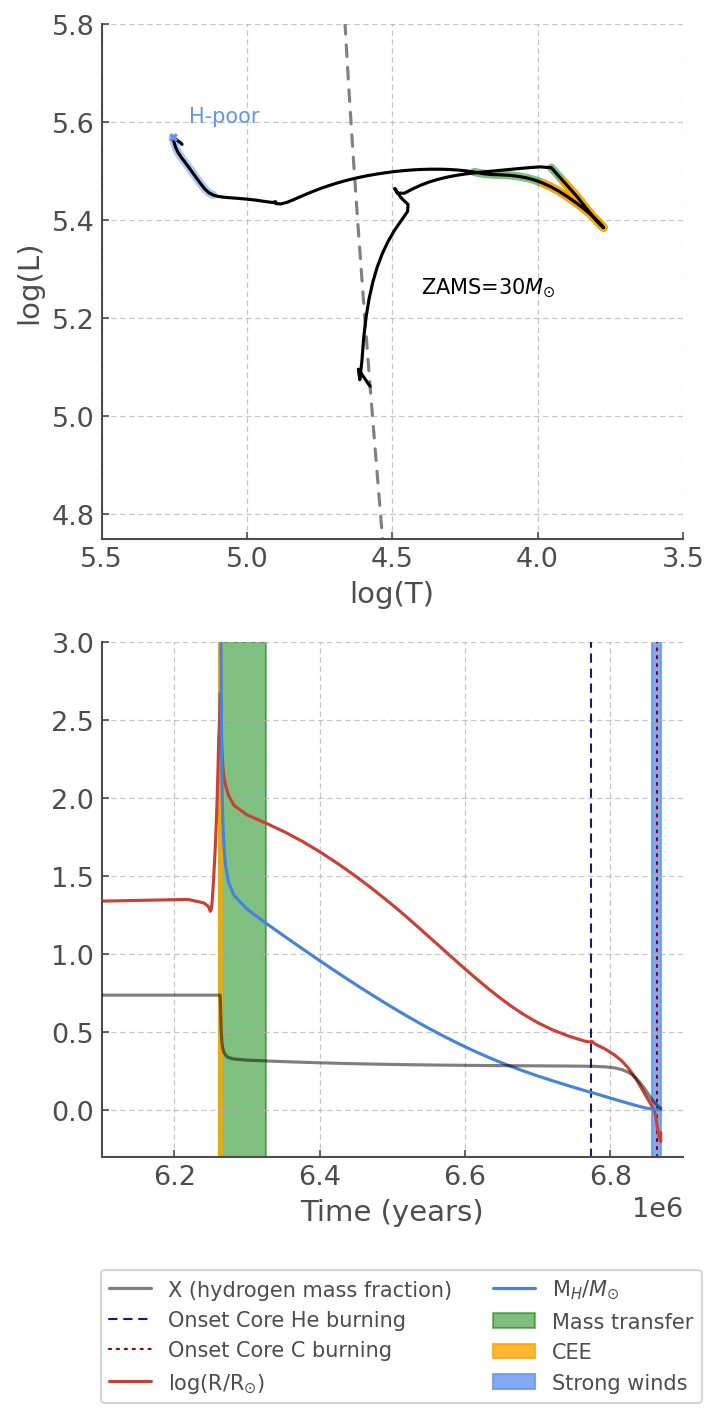

In [57]:
fig, ax = plt.subplots(nrows=2,figsize=(5,10))


ax[0].plot(MS_T, MS_L, ls='--', c='grey', label='Zero Age Main Sequence')
ax[0].plot(data_prim['log(T1)'], data_prim['log(L1)'], label='ZAMS=30', zorder=15, c='k')

ax[0].plot(CEE_1['log(T1)'], CEE_1['log(L1)'], c='orange', lw=4, alpha=1, label='CEE phase', zorder=10)
ax[0].plot(mt_1['log(T1)'], mt_1['log(L1)'], c='green', lw=4, alpha=0.5,
         label='mass transfer phase')

ax[0].plot(last_loss_1['log(T1)'], last_loss_1['log(L1)'], c='cornflowerblue', lw=4, alpha=0.5,
         label='Rapid mass loss')
ax[0].scatter(Hpoor_1['log(T1)'],Hpoor_1['log(L1)'], marker='x', s=10, c='cornflowerblue', zorder=20, label='H poor')

ax[0].text(4.4, 5.25, r'ZAMS=30$M_{\odot}$', color='k')
ax[0].text(5.2, 5.6, 'H-poor', color='cornflowerblue')

ax[0].set_ylim([4.75,5.8])
ax[0].set_xlim([5.5, 3.5])
ax[0].set_xlabel('log(T)')
ax[0].set_ylabel('log(L)')


######################
ax[1].plot(data_prim.age, data_prim.X, color='k', zorder=100, alpha=0.5, 
           label='X (hydrogen mass fraction)')

ax[1].axvspan(mt_1.age.min(), mt_1.age.max(), color='green',label='Mass transfer', alpha=0.5)
ax[1].axvspan(CEE_1.age.min(), CEE_1.age.max(), color='orange', label='CEE', alpha=0.8)
ax[1].axvspan(last_loss_1.age.min(), last_loss_1.age.max(), color='cornflowerblue', 
              label='Strong winds', alpha=0.8)

ax[1].axvline(6773698.0, ls='--', color='midnightblue', lw=1, label='Onset Core He burning')
ax[1].axvline(6864528.0, ls=':', color='darkred', lw=1, label='Onset Core C burning')

ax[1].plot(data_prim.age, data_prim['log(R1)'], label=r'log(R/R$_{\odot}$)',)
ax[1].plot(data_prim.age, data_prim.MH1, label=r'M$_{H}/M_{\odot}$')



ax[1].set_xlim([6.1e6,6.9e6])
ax[1].set_ylim([-0.3,3])
ax[1].legend(loc=1, fontsize=10, ncol=2, bbox_to_anchor=(1.05, -0.2))
ax[1].set_xlabel('Time (years)')
